# Project_1: EDA of Titanic dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
df.columns.tolist()

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

# Dataset description.
* The Titanic dataset is a well-known dataset in machine learning and statistics.
* It contains information about passengers aboard the RMS Titanic, including demographics, ticket    class, and survival status.
* The dataset is often used for predictive modeling to analyze factors influencing survival during the ship's tragic sinking in 1912.
* Key variables include passenger age, gender, ticket class, fare, and whether the individual survived or not.
* Researchers use this dataset for training and testing models to predict survival probabilities based on various features.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# Missing values.
Age and deck has missing values.

In [22]:
df.age.isnull().sum()
print(f'The number of missing values in age feature is:', {df.age.isnull().sum()}, 'out of', len(df))
df.deck.isnull().sum()
print(f'The number of missing values in deck feature is:', {df.deck.isnull().sum()}, 'out of', len(df))

The number of missing values in age feature is: {177} out of 891
The number of missing values in deck feature is: {688} out of 891


In [26]:
df.deck.value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [31]:
mis_age_per = round((df.age.isnull().sum() * 100)/len(df), 3)
print(f'The number of missing values in age feature is:', {mis_age_per}, '%')
mis_deck_per = round((df.deck.isnull().sum() * 100)/len(df), 3)
print(f'The number of missing values in deck feature is:', {mis_deck_per}, '%')

The number of missing values in age feature is: {19.865} %
The number of missing values in deck feature is: {77.217} %


# Dataset summary.

The Titanic dataset typically includes the following attributes:

1.  PassengerId: Unique identifier for each passenger.
2.  Survived: Binary variable indicating whether the passenger survived (1) or not (0).
3.  Pclass (Ticket Class): Class of the ticket, representing socio-economic status (1st, 2nd, or 3rd  class).
4.  Name: Name of the passenger.
5.  Sex: Gender of the passenger.
6.  Age: Age of the passenger in years.
7.  SibSp: Number of siblings/spouses aboard the Titanic.
8.  Parch: Number of parents/children aboard the Titanic.
9.  Ticket: Ticket number.
10. Fare: Fare paid for the ticket.
11. Cabin: Cabin number where the passenger stayed.
12. Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

# Data exploration plan. 
The data exploration plan depends upon the following steps.

## 1. Data Overview:

I will try to understand the dataset's structure and content, by displaying the first few rows to inspect the variable types, data format, and potential missing values. I can utilize summary statistics to get an overview of numerical features, such as mean, median, and standard deviation.

## 2. Data Visualization:

Visualization tools can be used to gain insights into the distribution of key variables.
Histograms are useful for numerical features like age and fare to understand their patterns.
Bar plots and charts for categorical variables such as sex, class, and embarkation port to observe distribution trends.

## 3. Missing Values Handling:

I have to identify and handle missing values by checking the completeness of each attribute.
Consider imputing missing numerical values with means or medians, and missing categorical values with mode or a custom strategy. To evaluate the impact of missing data on the analysis and choose appropriate methods for imputation.

## 4. Correlation Analysis:

I will examine correlations between variables to identify potential patterns or dependencies.
Utilizing correlation matrices and heatmaps to visualize relationships, especially focusing on features related to survival. The analysis is used to identify multicollinearity, which may affect the performance of certain models.

## 5. Feature Engineering:

I will create new features or transform existing ones to enhance model performance. To extract information from variables like name or cabin to derive meaningful features. To consider creating categorical bins for numerical features to capture non-linear relationships. We can evaluate the impact of engineered features on model accuracy during later stages of analysis.

In [32]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Distribution of Fare in Titanic Dataset')

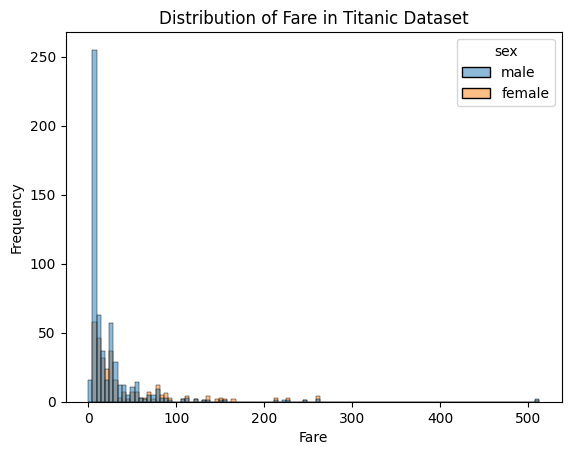

In [41]:
sns.histplot(df, x='fare', hue='sex',)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare in Titanic Dataset')

# Data cleaning steps.
The data cleaning steps are elaborated as follows:

## 1.Handling Missing Values:

First of all, I will identify and analyze the presence of missing values in the dataset. Then an appropriate strategy for handling missing data would be selected, such as imputation or removal. I will implement the chosen strategy based on the nature and impact of missing values.

## 2. Duplicate Removal:

I will check for and remove any duplicate records in the dataset. Duplicates may arise due to data collection errors or system issues and can distort analysis results.

## 3. Outlier Detection and Treatment:

I will identify outliers by analyzing the distribution of numerical features. It will be decided whether to remove outliers or transform them using techniques like robust scaling. I will consider the impact of outliers on statistical analyses and modeling.

## 4. Data Type Conversion:

I will ensure that data types are appropriate for each variable. Converting categorical variables to the correct data type, and address any inconsistencies in numerical representations. 
Standardization and Normalization:

## 5. Standarization and Normalization:
It is important to standardize or normalize numerical features to bring them to a common scale.
because certain machine learning algorithms that are sensitive to the scale of input features.
Standardization involves scaling features to have a mean of 0 and a standard deviation of 1, while normalization scales features to a range between 0 and 1.

# Handling Missing Values in 'Age':
Imputation with Mean/Median:

I will substitute missing 'Age' values with the mean or median age of the dataset. This method maintains the overall distribution of ages.

In [47]:
df['age'].fillna(df['age'].median(), inplace=True)
print(f'After imputing the number of missing values in age: ',df.age.isnull().sum())

After imputing the number of missing values in age:  0


# Handling missing values in deck.

The missing value percentage in deck is more than 30 %, so it will be dropped.


In [49]:
print(f'The number of missing values in deck feature is:', {mis_deck_per}, '%')

The number of missing values in deck feature is: {77.217} %


In [ ]:
df.drop('deck', axis=1, inplace=True)

# The number of features after dropping deck feature.

In [56]:
df.shape


(891, 14)

# Finding duplicate observations.


In [75]:
duplicate_rows = df[df.duplicated()]
print('Duplicate_rows:')
print(duplicate_rows)


Duplicate_rows:
     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
47          1       3  female  28.0      0      0   7.7500        Q   Third   
55          1       1    male  28.0      0      0  35.5000        S   First   
76          0       3    male  28.0      0      0   7.8958        S   Third   
77          0       3    male  28.0      0      0   8.0500        S   Third   
87          0       3    male  28.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
870         0       3    male  26.0      0      0   7.8958        S   Third   
877         0       3    male  19.0      0      0   7.8958        S   Third   
878         0       3    male  28.0      0      0   7.8958        S   Third   
884         0       3    male  25.0      0      0   7.0500        S   Third   
886         0       2    male  27.0      0      0  13.0000        S  Second   

       who  adult_male  embark_town

# Finding duplicate Features.


In [77]:
# Transpose the DataFrame to switch rows and columns
transposed_data = df.transpose()

# Display duplicate columns
duplicate_features = transposed_data[transposed_data.duplicated()]

# Show the duplicate features
print("Duplicate Features:")
print(duplicate_features.transpose())


Duplicate Features:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[891 rows x 0 columns]


# Key findings and insights.
The key findings and insights are listed as below:

## 1. Survival Disparities:

Analysis reveals that passengers in higher socio-economic classes (Pclass 1) had a higher likelihood of survival, indicating a socio-economic influence on outcomes.

## 2. Gender Impact:

Females exhibited a significantly higher survival rate compared to males, underscoring the adherence to the "women and children first" protocol during the Titanic tragedy.

## 3. Age and Survival:

Children and elderly passengers were more likely to survive, while the middle-aged demographic faced a relatively lower survival rate, suggesting a preference for vulnerable groups.

## 4. Family Relationships:

The passengers traveling with a small number of family members (SibSp and Parch) had better survival chances, highlighting the importance of social support during the disaster.

## 5. Embarkation Port Influence:

Survival rates varied based on the port of embarkation, with passengers boarding from Cherbourg (C) demonstrating a higher likelihood of survival compared to those from Southampton (S) or Queenstown (Q). Further investigation may reveal socio-cultural factors contributing to this disparity.

([<matplotlib.axis.XTick at 0x1623b2de850>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

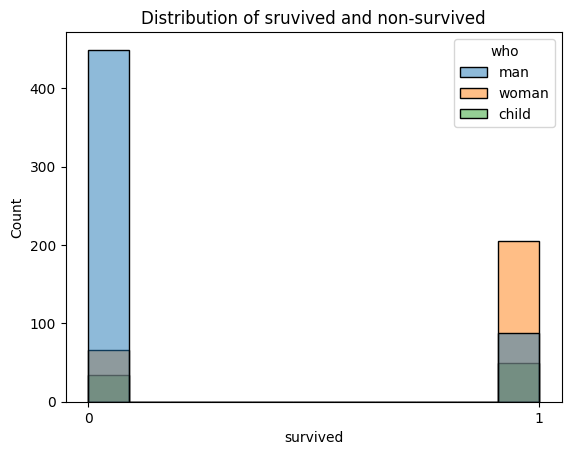

In [65]:
sns.histplot(data=df, x='survived', hue='who')
plt.title('Distribution of sruvived and non-survived')

Text(0.5, 1.0, 'Distribution of sruvived and non-survived')

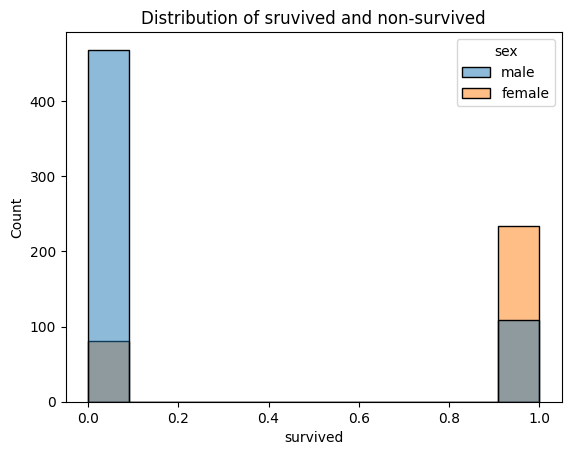

In [67]:
sns.histplot(data=df, x='survived', hue='sex')
plt.title('Distribution of sruvived and non-survived')

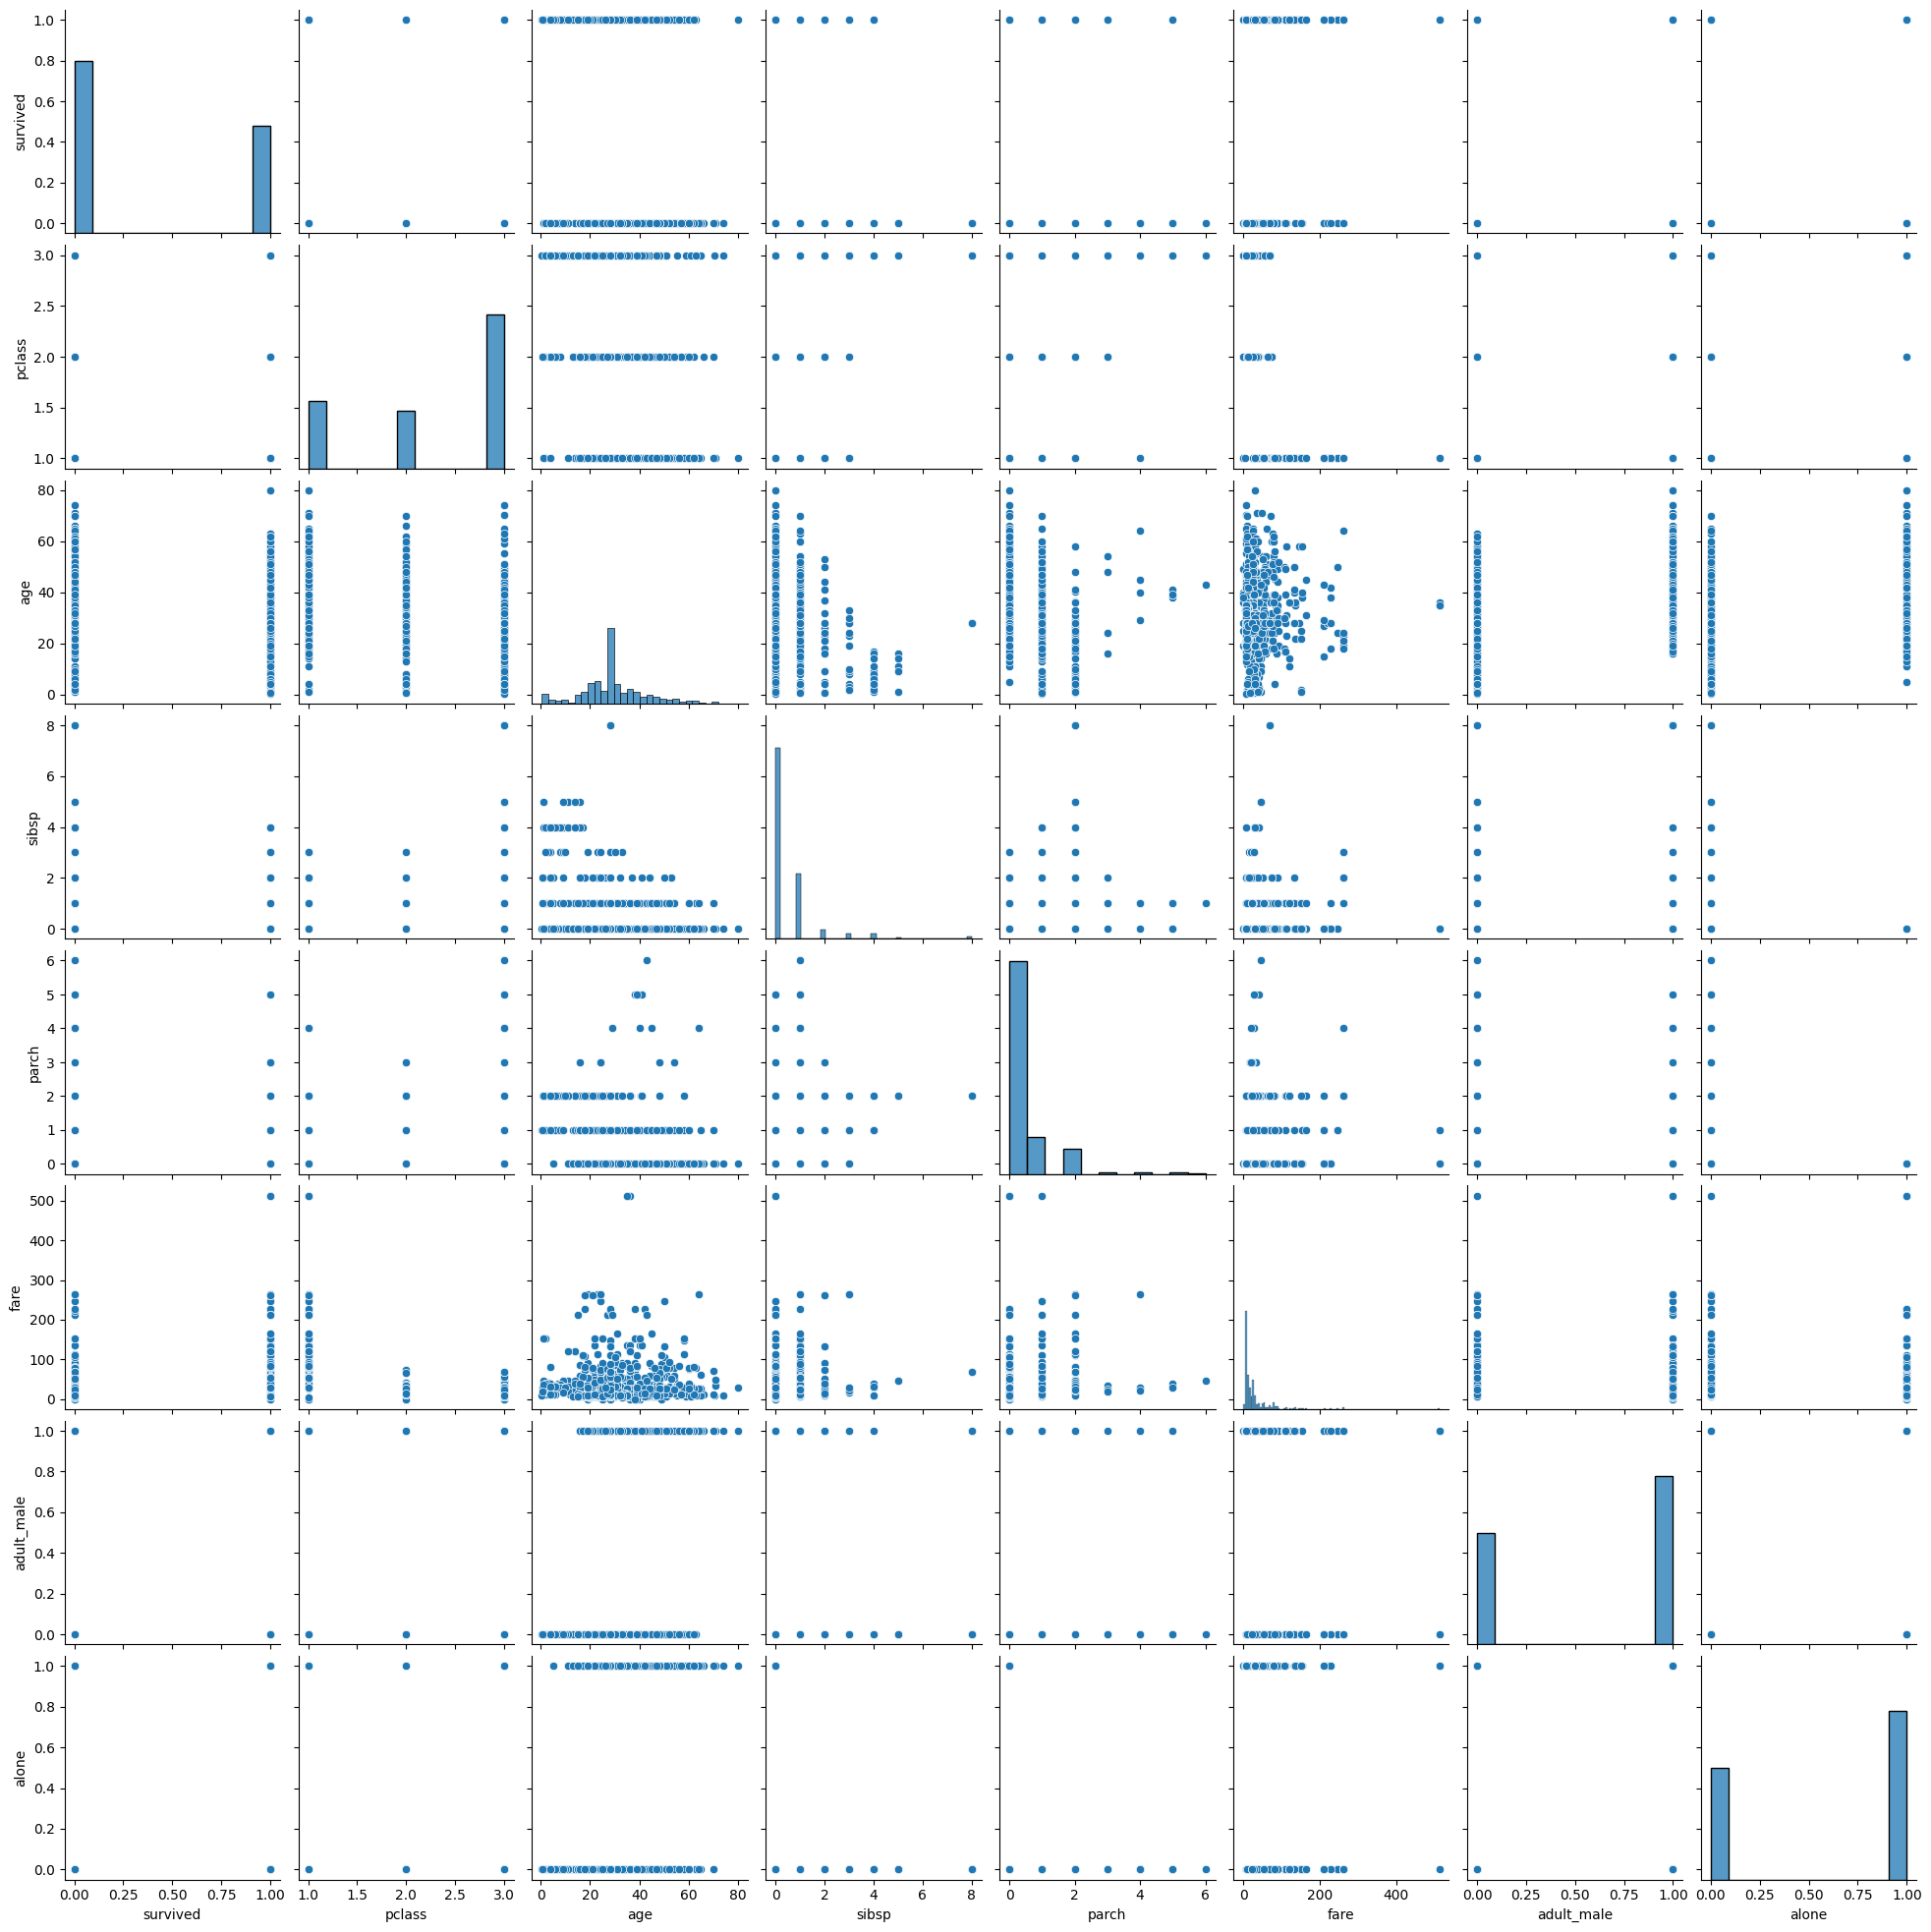

In [68]:
sns.pairplot(df)

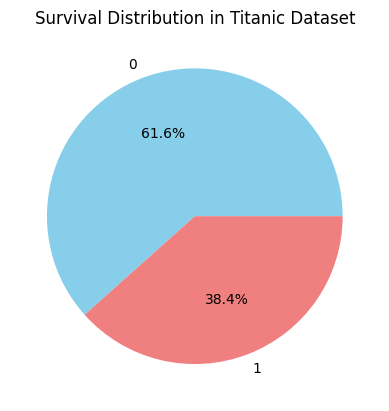

In [70]:
survival_counts = df['survived'].value_counts()

# Plotting the pie chart
plt.pie(survival_counts, labels=survival_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Survival Distribution in Titanic Dataset')

# Show the plot
plt.show()


# Three Hypothesis of the data.

## First hypothesis: Socio-Economic Status Hypothesis:

Null Hypothesis (H0): There is no significant association between passenger socio-economic class (Pclass) and survival.
Alternative Hypothesis (H1): Higher socio-economic classes (Pclass 1 and 2) are associated with a greater likelihood of survival compared to lower classes (Pclass 3).

## Second hypothesis: Gender Bias Hypothesis:

Null Hypothesis (H0): There is no significant difference in the survival rates between male and female passengers.
Alternative Hypothesis (H1): Female passengers are more likely to survive than male passengers, reflecting the adherence to the "women and children first" protocol.

## Third hypothesis: Age-Dependent Survival Hypothesis:

Null Hypothesis (H0): Age does not have a significant impact on the likelihood of survival.
Alternative Hypothesis (H1): Children and elderly passengers are more likely to survive than middle-aged individuals, indicating a preference for vulnerable age groups during the disaster.

# Significance test on First Hypothesis:

Chi-square Test:
Create a Contingency Table:

|  Status       | Pclass 1 or 2 |    Pclass 3   |
|---------------|---------------|---------------|
| Survived      | Observed Count| Observed Count|
| Not Survived  | Observed Count| Observed Count|

Calculate Expected Frequencies:
Calculate the expected frequencies for each cell in the contingency table based on the overall survival rate and Pclass distribution.

Compute the Chi-square Statistic:
Use the formula for the chi-square statistic: χ² = Σ((Observed - Expected)² / Expected)

Determine Degrees of Freedom:
Degrees of freedom = (Number of rows - 1) * (Number of columns - 1)

Set Significance Level (α):
Choose a significance level (e.g., α = 0.05).

Compare with Critical Value or P-value:
Compare the calculated chi-square statistic with the critical chi-square value from the chi-square distribution table or use statistical software to obtain the p-value.

Make a Decision:
If the p-value is less than the chosen significance level, reject the null hypothesis, suggesting a significant association between socio-economic class and survival.

In [4]:
df.columns.tolist()

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

# Python code for above test.

In [5]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['survived'], df['pclass'])

# Perform the Chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Define the significance level
alpha = 0.05

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")

# Make a decision based on the p-value
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association between Pclass and survival.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between Pclass and survival.")


Chi-square statistic: 102.88898875696056
P-value: 4.549251711298793e-23
Reject the null hypothesis. There is a significant association between Pclass and survival.


In [83]:
df.columns.tolist()

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'embark_town',
 'alive',
 'alone']

<Axes: xlabel='age', ylabel='fare'>

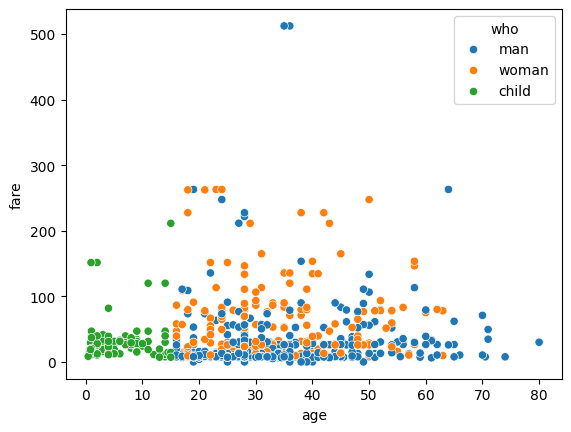

In [86]:
sns.scatterplot(data=df, y=df['fare'], x=df['age'], hue='who')
plt.title('Comparison of Fare and Age with who')

Text(0.5, 1.0, 'Comparison of Fare and Age with sex.')

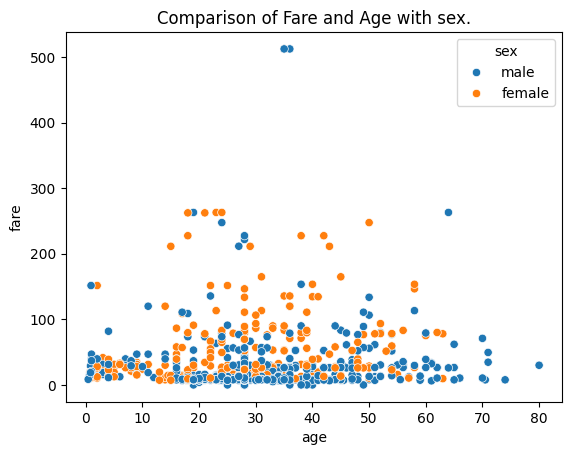

In [87]:
sns.scatterplot(data=df, y=df['fare'], x=df['age'], hue='sex')
plt.title('Comparison of Fare and Age with sex.')

<Axes: ylabel='fare'>

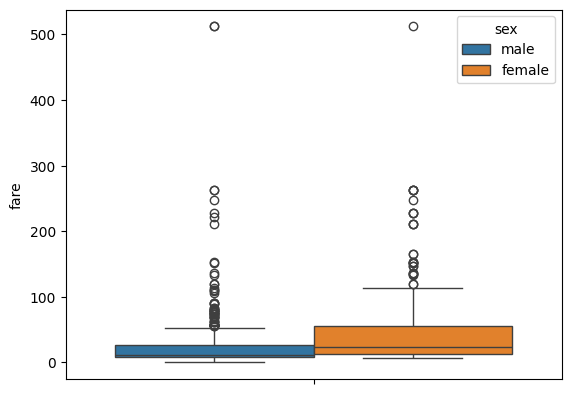

In [98]:
sns.boxplot(data=df, y='fare', hue='sex')

<Axes: ylabel='age'>

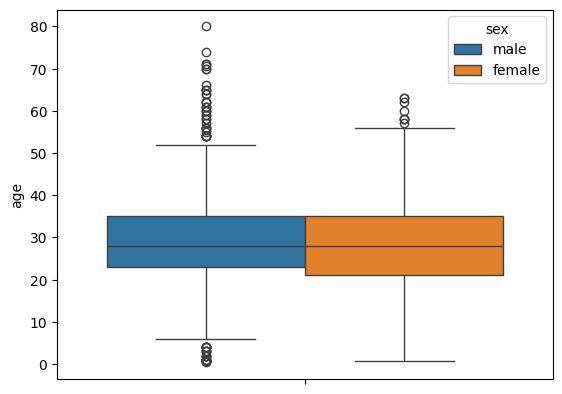

In [92]:
sns.boxplot(data=df, y='age', hue='sex')

# Next steps to analyze the data.

I can use advanced visualization methods, statistical models such as logistic regression, decision trees, or random forests to predict survival probabilities. Cross-validation can be implemented to assess the model's generalization performance. Finally, various metrics like accuracy, precision, recall, and F1 score can be used to analyze the machine learning model. 

# Summary:
The exploratory data analysis (EDA) of the Titanic dataset revealed significant survival disparities based on socio-economic class and gender. Additional insights included age-dependent survival patterns and varying outcomes based on the embarkation port.